Import những thư viện cần thiết

In [22]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
import cv2

Load dữ liệu

In [23]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Biểu diễn tập dữ liệu

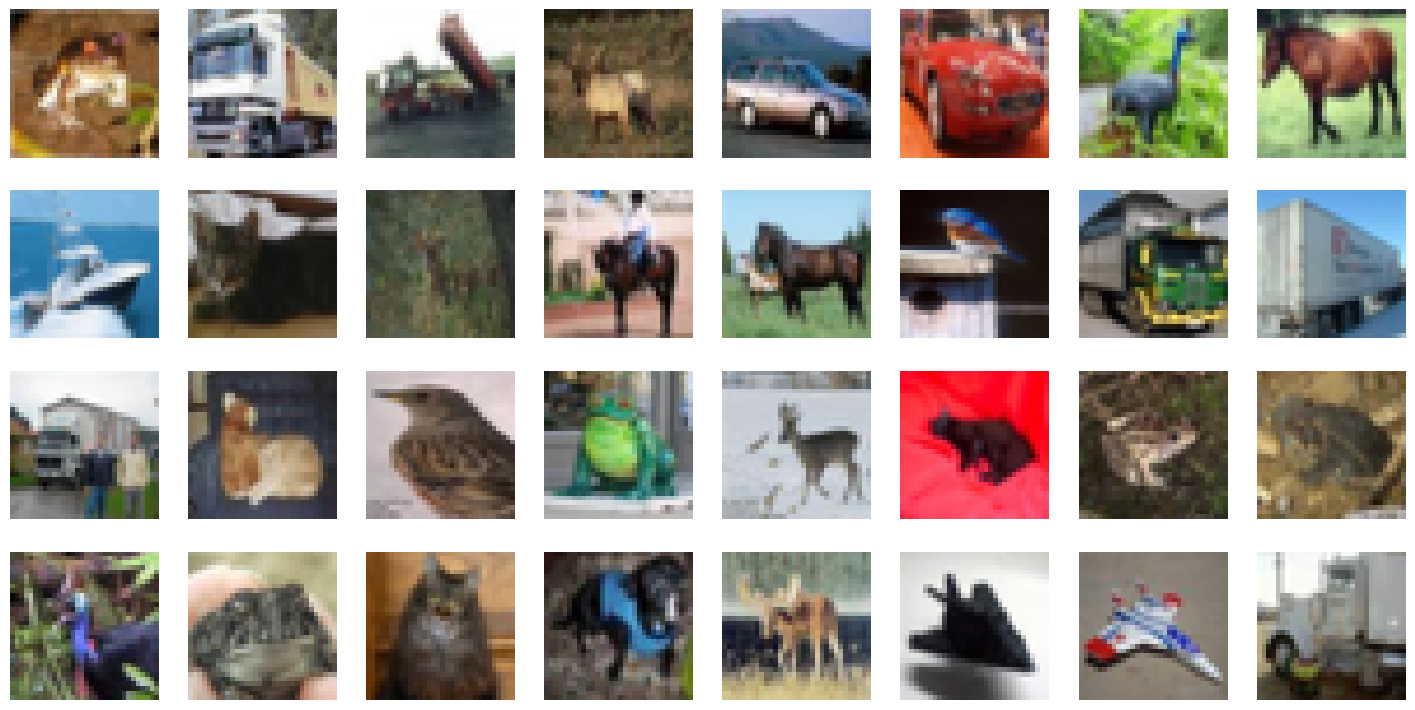

In [35]:
plt.figure(figsize=(18, 9))
 
num_rows = 4
num_cols = 8
 
# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    plt.axis("off")

Chuẩn hóa dữ liệu

In [24]:
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

Thiết kế mô hình CNN

In [25]:
model = Sequential()
    

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Các tầng của mô hình và cấu hình quá trình huấn luyện

In [26]:
model.summary()
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'],
            )


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Bắt đầu huấn luyện mô hình học máy

In [27]:
history = model.fit(X_train,
        y_train,
        batch_size=256, 
        epochs=31, 
        verbose=1, 
        validation_split=.3,
        )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.1780 - loss: 2.1974 - val_accuracy: 0.3285 - val_loss: 1.8404
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.3273 - loss: 1.8337 - val_accuracy: 0.4124 - val_loss: 1.5801
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.3955 - loss: 1.6475 - val_accuracy: 0.4825 - val_loss: 1.4472
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.4615 - loss: 1.4810 - val_accuracy: 0.4673 - val_loss: 1.4914
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.5039 - loss: 1.3829 - val_accuracy: 0.5507 - val_loss: 1.2454
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.5429 - loss: 1.2790 - val_accuracy: 0.5892 - val_loss: 1.1317
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.5773 - loss: 1.1873 - val_accuracy: 0.6265 - val_loss: 1.0634
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.6074 - loss: 1.1182 -

Hàm vẽ biểu đồ 

In [28]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
     
    fig, ax = plt.subplots(figsize=(15, 4))
 
    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
         
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
     
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 30])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

Biểu đồ về kết quả huấn luyện mô hình

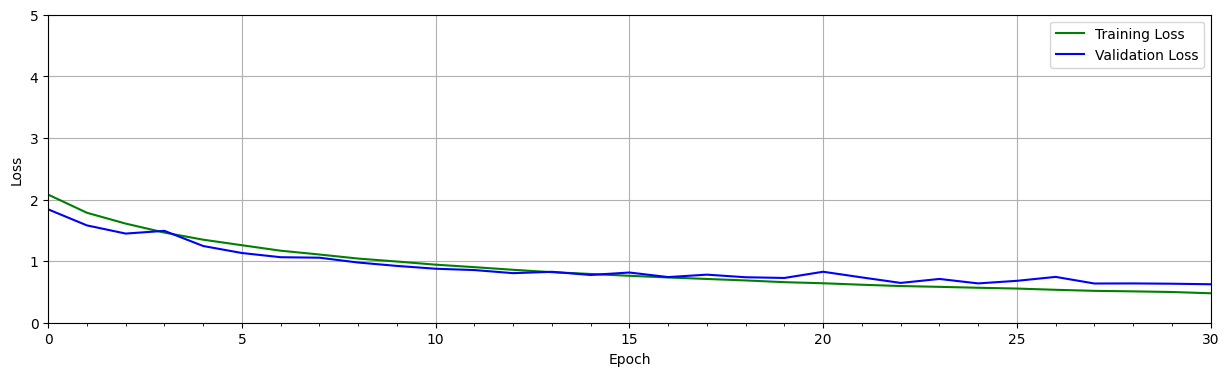

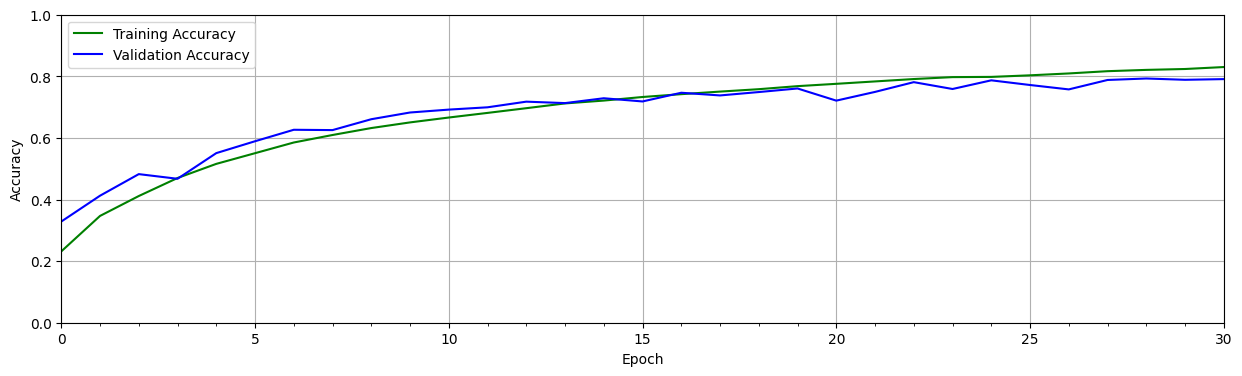

In [29]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]
     
plot_results([ train_loss, valid_loss ],        
            ylabel="Loss", 
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);
 
plot_results([ train_acc, valid_acc ], 
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

Tính toán độ chính xác của mô hình

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7889 - loss: 0.6440
Test accuracy: 78.370


Confusion matrix 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


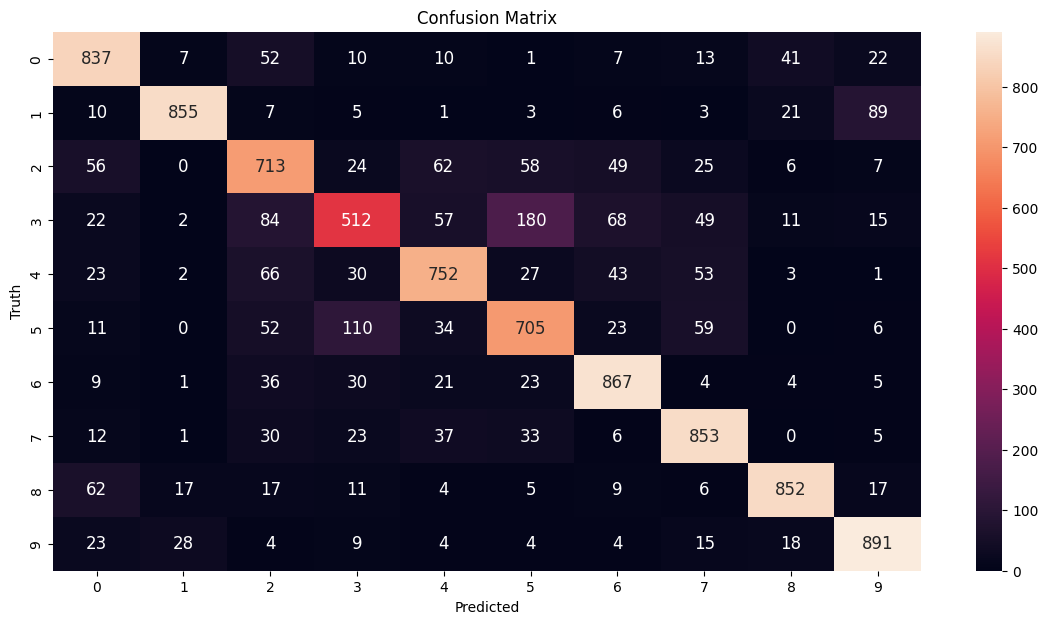

In [31]:
# Generate predictions for the test dataset.
predictions = model.predict(X_test)
 
# For each sample image in the test dataset, select the class label with the highest probability.
predicted_labels = [np.argmax(i) for i in predictions]
# Convert one-hot encoded labels to integers.
y_test_integer_labels = tf.argmax(y_test, axis=1)
 
# Generate a confusion matrix for the test dataset.
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

# Plot the confusion matrix as a heatmap.
plt.figure(figsize=[14, 7])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 12})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Độ chính xác của mô hình trên một số dữ liệu trong tập test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction accuracy:  0.83


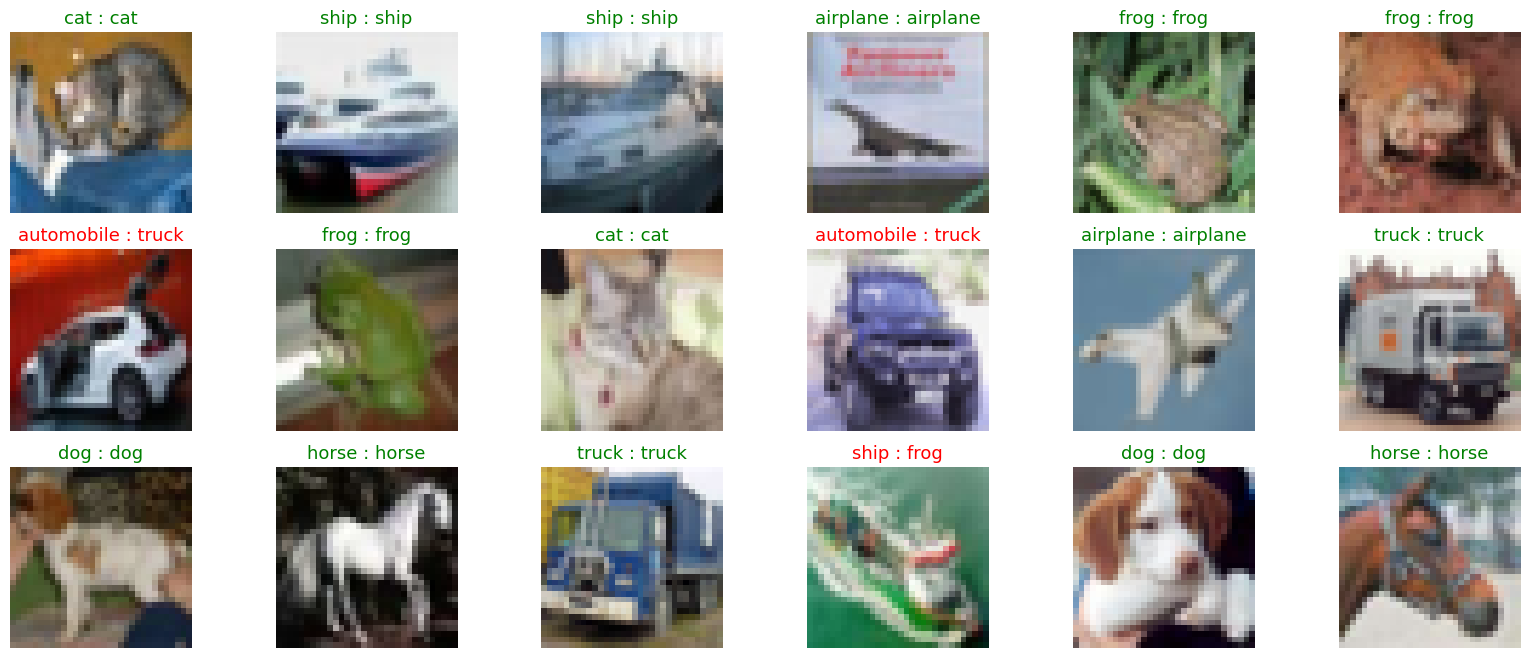

In [32]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck' ]
num_rows = 3
num_cols = 6
    
data_batch = X_test[0:num_rows*num_cols]

predictions = model.predict(data_batch)

plt.figure(figsize=(20, 8))
num_matches = 0
        
for idx in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    plt.axis("off")
    plt.imshow(data_batch[idx])

    pred_idx = tf.argmax(predictions[idx]).numpy()
    truth_idx = np.nonzero(y_test[idx])
            
    title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
    title_obj = plt.title(title, fontdict={'fontsize':13})
            
    if pred_idx == truth_idx:
        num_matches += 1
        plt.setp(title_obj, color='g')
    else:
        plt.setp(title_obj, color='r')
                
    acc = num_matches/(idx+1)
print("Prediction accuracy: ", int(100*acc)/100)

Đọc các hình ảnh trong folder image

In [33]:
def load_and_preprocess_images(folder_path):
    images = []
    filenames = []  
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')): 
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None: 
                img = cv2.resize(img, (32, 32)) 
                img = img.astype("float32") / 255.0 
                images.append(img)
                filenames.append(filename) 
    return np.array(images), filenames
folder_path = "image"  # Replace with the actual path to your image folder
images, filenames = load_and_preprocess_images(folder_path)
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Sử dụng các hình ảnh trong folder image bên ngoài tập dữ liệu để kiểm tra độ chính xác của mô hình (ngoài tập train và tập test)

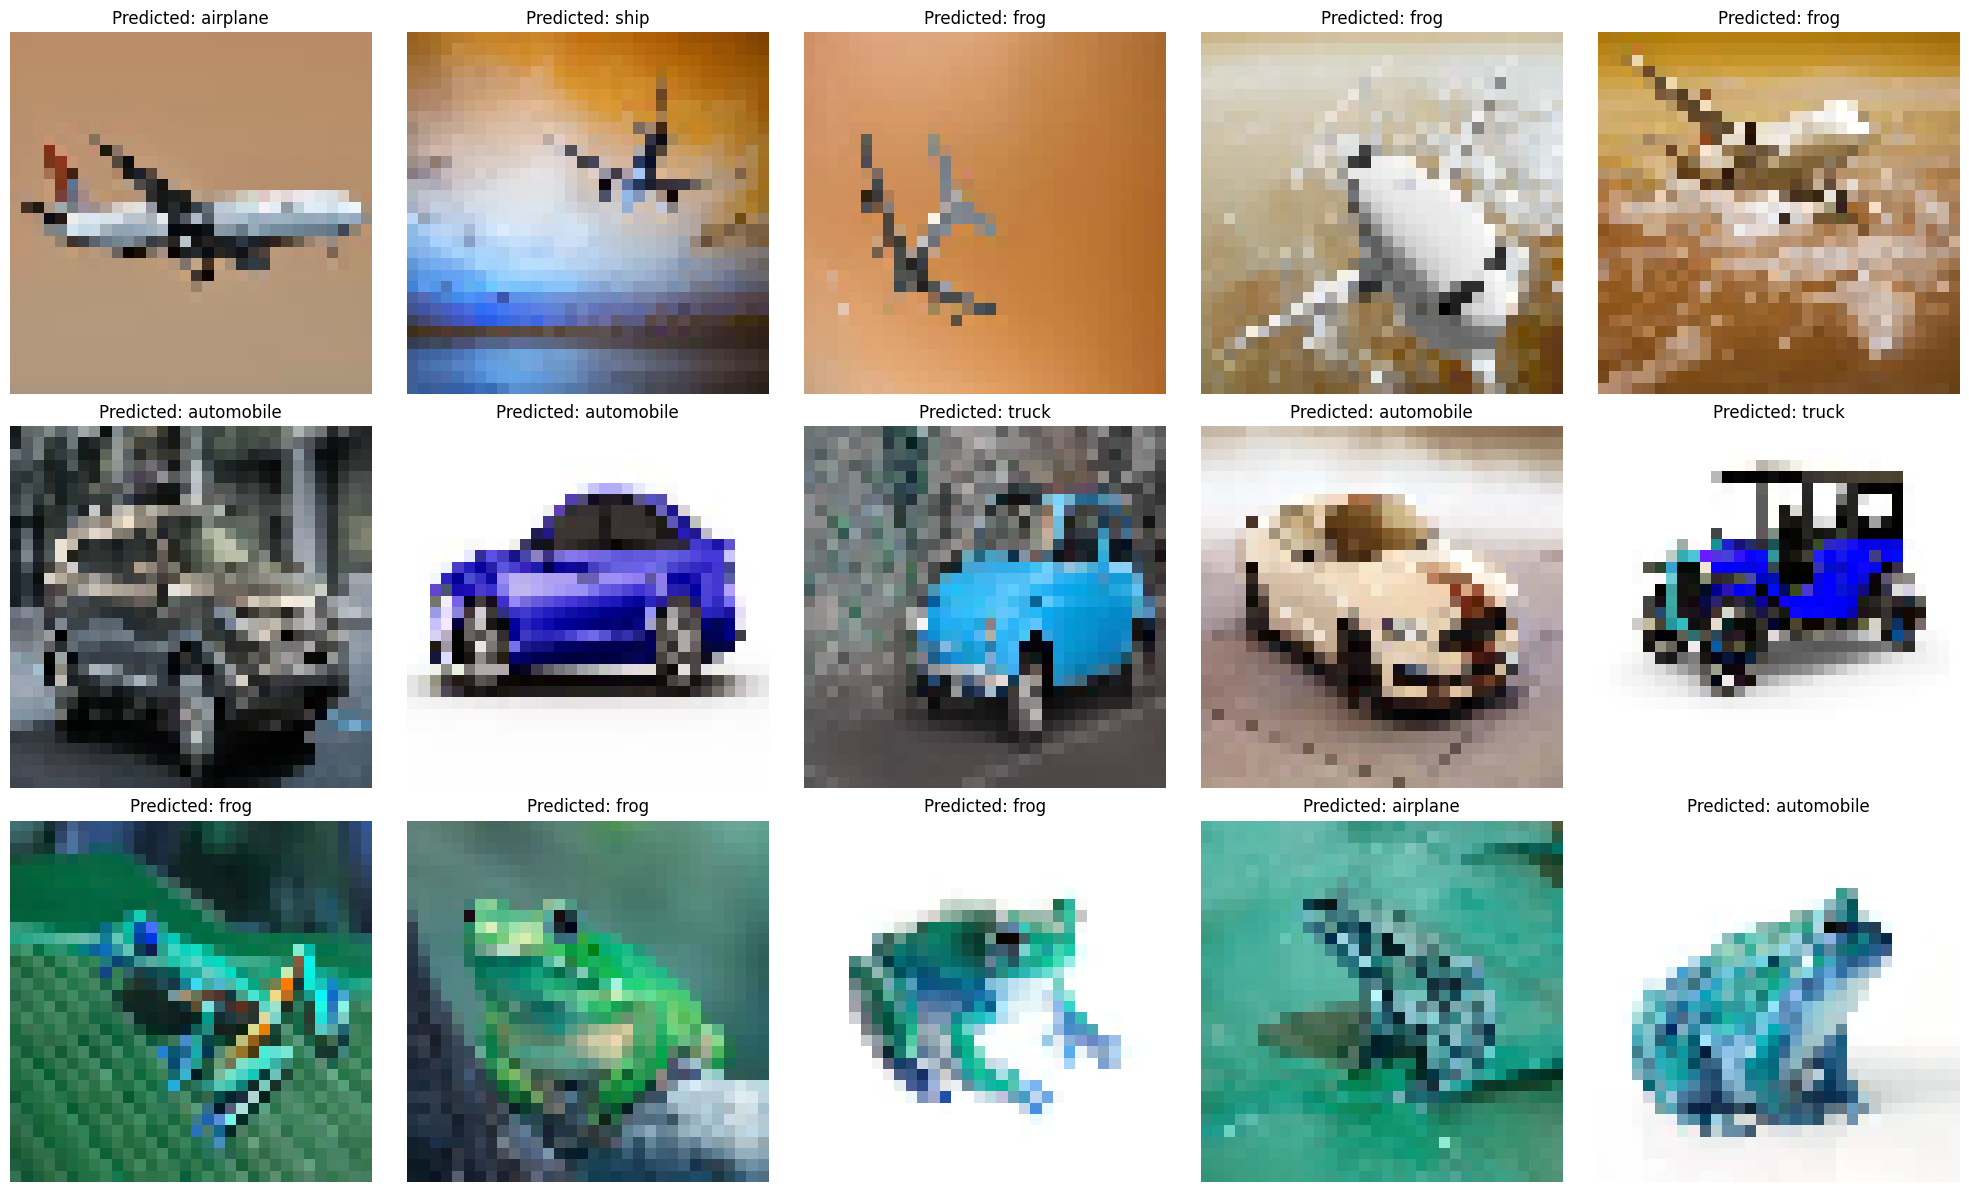

In [34]:
n_images = len(images)
n_cols = 5  
n_rows = int(np.ceil(n_images / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()
for i, filename in enumerate(filenames):
    axes[i].imshow(images[i])
    axes[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}")
    axes[i].axis('off')  
for j in range(n_images, n_rows * n_cols):
    axes[j].axis('off')
plt.tight_layout()  
plt.show()